In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymysql

In [4]:
host='localhost'
user='root'
password='7321918676'
database='pkmon'

conn=pymysql.connect(host=host,user=user,password=password,database=database)

In [5]:
querry = "select * from pokemon_copy"

In [7]:
df=pd.read_sql(querry,conn)

In [8]:
df

,pokemon_id,name,primary_type,secondary_type,first_appreance,generation,category,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
0,1,bulbasaur,grass,poison,red/blue,gen 1,regular,318,45,49,49,65,65,45
1,2,ivysaur,grass,poison,red/blue,gen 1,regular,405,60,62,63,80,80,60
2,3,venusaur,grass,poison,red/blue,gen 1,regular,525,80,82,83,100,100,80
3,4,charmander,fire,,red/blue,gen 1,regular,309,39,52,43,60,50,65
4,5,charmeleon,fire,,red/blue,gen 1,regular,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,electric,dragon,scarlet/violet,gen 9,paradox,590,125,73,91,137,89,75
1021,1022,iron-boulder,rock,psychic,scarlet/violet,gen 9,regular,590,90,120,80,68,108,124
1022,1023,iron-crown,steel,psychic,scarlet/violet,gen 9,paradox,590,90,72,100,122,108,98
1023,1024,terapagos,normal,,scarlet/violet,gen 9,legendary,450,90,65,85,65,85,60


In [9]:
conn.close()

In [12]:
df.head(4)

,pokemon_id,name,primary_type,secondary_type,first_appreance,generation,category,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
0,1,bulbasaur,grass,poison,red/blue,gen 1,regular,318,45,49,49,65,65,45
1,2,ivysaur,grass,poison,red/blue,gen 1,regular,405,60,62,63,80,80,60
2,3,venusaur,grass,poison,red/blue,gen 1,regular,525,80,82,83,100,100,80
3,4,charmander,fire,,red/blue,gen 1,regular,309,39,52,43,60,50,65


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pokemon_id,1025.0,513.000000,296.036315,1.0,257.0,513.0,769.0,1025.0
total_base_stats,1025.0,427.686829,112.770735,175.0,325.0,450.0,508.0,720.0
hp,1025.0,70.184390,26.631054,1.0,50.0,68.0,85.0,255.0
attack,1025.0,77.521951,29.782541,5.0,55.0,75.0,100.0,181.0
defense,1025.0,72.507317,29.286972,5.0,50.0,70.0,90.0,230.0
special_attack,1025.0,70.080976,29.658378,10.0,47.0,65.0,90.0,173.0
special_defense,1025.0,70.205854,26.639329,20.0,50.0,67.0,86.0,230.0
speed,1025.0,67.186341,28.717227,5.0,45.0,65.0,88.0,200.0


In [17]:
df.isnull().mean()*100

pokemon_id          0.0
name                0.0
primary_type        0.0
secondary_type      0.0
first_appreance     0.0
generation          0.0
category            0.0
total_base_stats    0.0
hp                  0.0
attack              0.0
defense             0.0
special_attack      0.0
special_defense     0.0
speed               0.0
dtype: float64

In [18]:
df.duplicated().sum()

0

In [19]:
df.dtypes

pokemon_id           int64
name                object
primary_type        object
secondary_type      object
first_appreance     object
generation          object
category            object
total_base_stats     int64
hp                   int64
attack               int64
defense              int64
special_attack       int64
special_defense      int64
speed                int64
dtype: object

<Axes: xlabel='primary_type'>

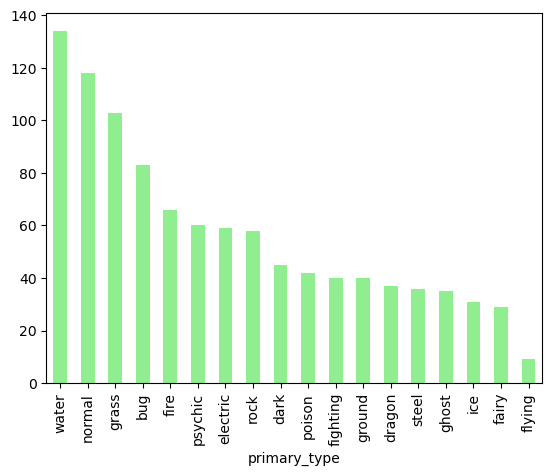

In [37]:
primary_type=df['primary_type'].value_counts().plot(kind='bar', color='lightgreen')
primary_type

<Axes: xlabel='generation'>

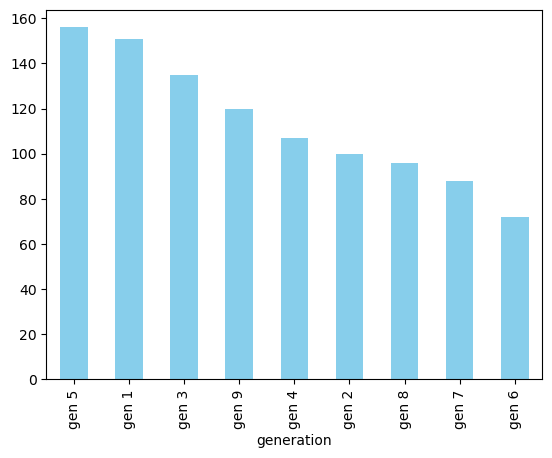

In [38]:
df['generation'].value_counts().plot(kind='bar', color='skyblue')


<Axes: xlabel='category'>

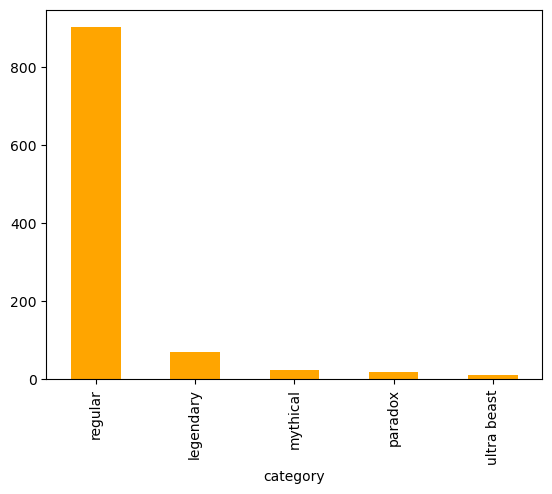

In [36]:
category=df['category'].value_counts().plot(kind='bar', color='orange')
category

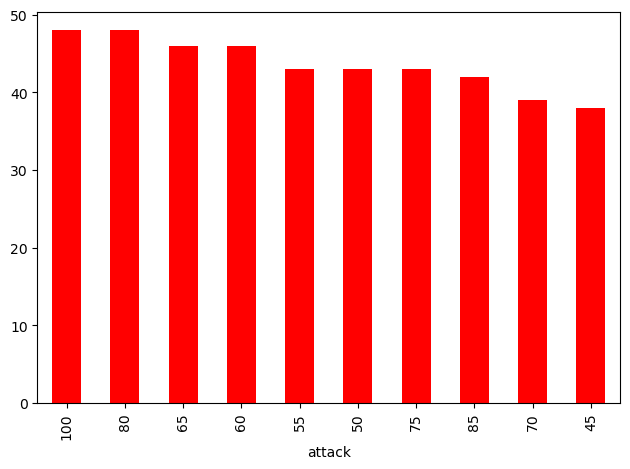

In [44]:
attack=df['attack'].value_counts().head(10).plot(kind='bar', color='red')
plt.tight_layout()
plt.xticks=45
plt.show()


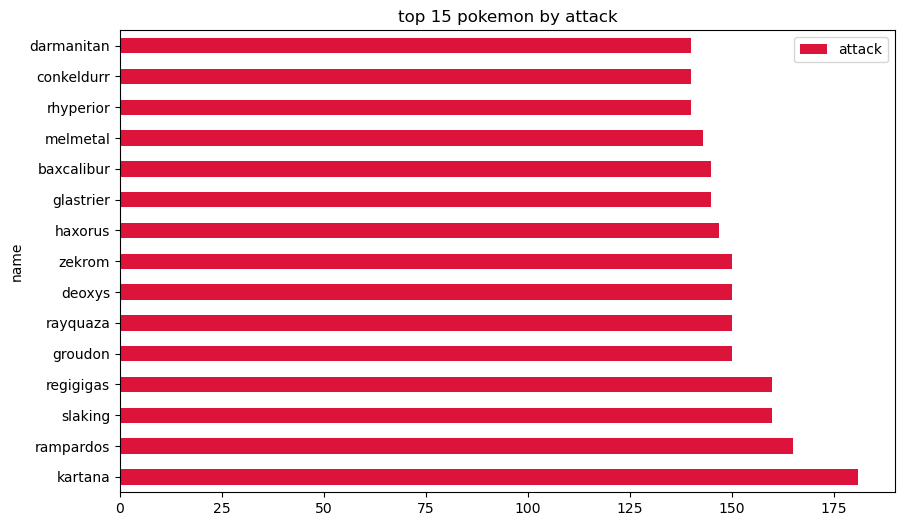

In [53]:
df.nlargest(15,'attack').plot(x='name',y='attack',kind='barh',figsize=(10,6),color='crimson',title='top 15 pokemon by attack')
plt.show()

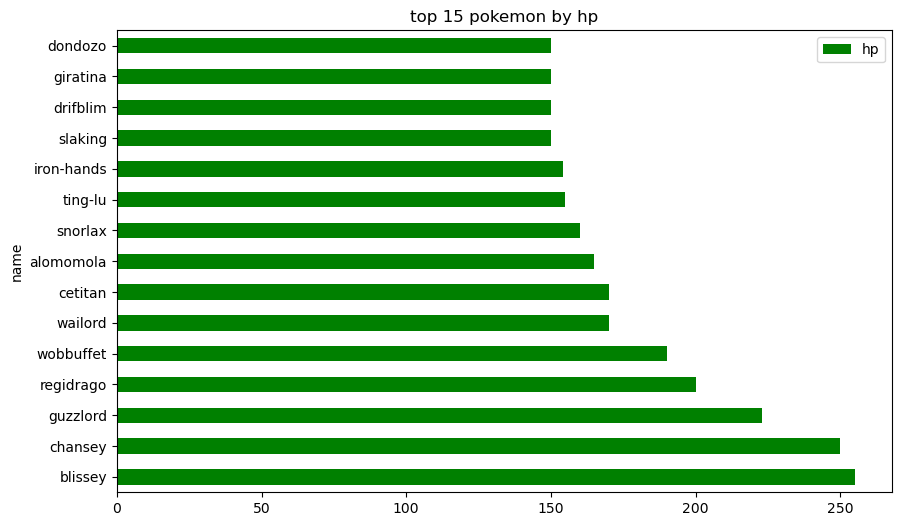

In [50]:
df.nlargest(15,'hp').plot(x='name',y='hp',kind='barh',figsize=(10,6),color='green',title='top 15 pokemon by hp')
plt.show()

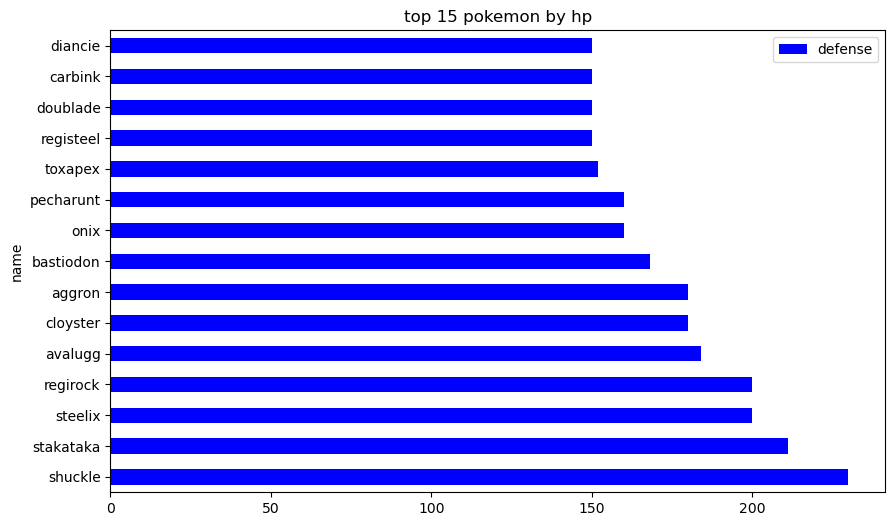

In [52]:
df.nlargest(15,'defense').plot(x='name',y='defense',kind='barh',figsize=(10,6),color='blue',title='top 15 pokemon by hp')
plt.show()

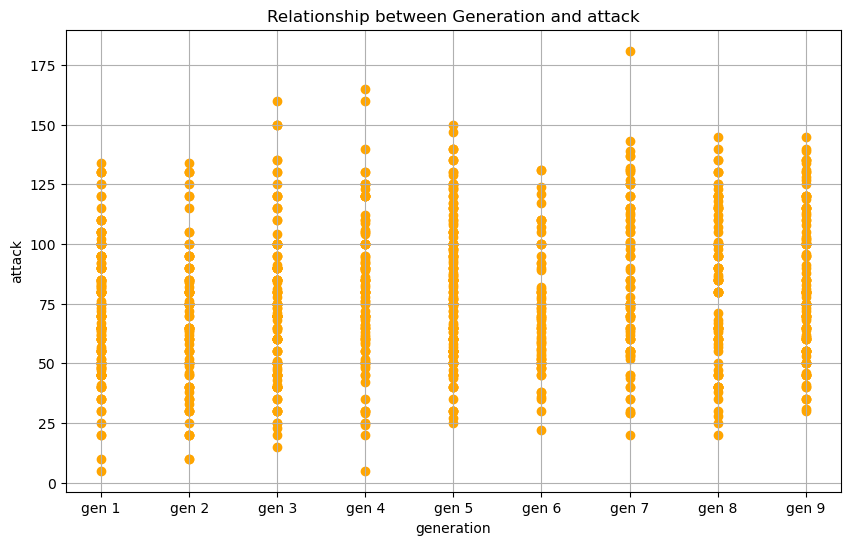

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(df['generation'],df['attack'],color='orange')
plt.xlabel('generation')
plt.ylabel('attack')
plt.title('Relationship between Generation and attack')
plt.grid(True)
plt.show()

In [58]:
import plotly.express as px

fig = px.scatter(df, x='generation', y='attack', color='generation', 
                 title='Relationship Between Attack and Generation', 
                 hover_data=['name', 'attack','hp','defense'])
fig.show()


In [59]:
df.columns

Index(['pokemon_id', 'name', 'primary_type', 'secondary_type',
       'first_appreance', 'generation', 'category', 'total_base_stats', 'hp',
       'attack', 'defense', 'special_attack', 'special_defense', 'speed'],
      dtype='object')

In [64]:
fig = px.scatter(df, x='generation', y='speed', color='generation', 
title='Relationship Between speed and Generation', 
hover_data=['name', 'speed','hp','defense'])
fig.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)

sns.bo

In [69]:
fig=px.box(df,y='attack',title='spread of attack',points='all')
fig.show()

In [72]:
fig=px.box(df,y='speed',title='spread od speed',points='all')
fig.show()

In [73]:
fig=px.box(df,y='defense',points='all')
fig.show()

In [74]:
fig=px.box(df,y='hp',points='all')
fig.show()

In [75]:
fig=px.box(df,y='special_attack',points='all')
fig.show()

In [81]:
fig=px.box(df,y='special_defense',points='all')
fig.show()


In [127]:
num_col=df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['pokemon_id', 'total_base_stats', 'hp', 'attack', 'defense',
       'special_attack', 'special_defense', 'speed'],
      dtype='object')

In [128]:
num_col

Index(['pokemon_id', 'total_base_stats', 'hp', 'attack', 'defense',
       'special_attack', 'special_defense', 'speed'],
      dtype='object')

In [87]:
fig = px.box(df, y=num_col, points='all')
fig.show()


In [88]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    return ul,ll
    

In [91]:
for col in num_col:  
    ul, ll = wisker(df[col])  
    df = df[(df[col] <= ul) & (df[col] >= ll)]  


In [92]:
fig = px.box(df, y=num_col, points='all')
fig.show()

In [93]:
df.columns

Index(['pokemon_id', 'name', 'primary_type', 'secondary_type',
       'first_appreance', 'generation', 'category', 'total_base_stats', 'hp',
       'attack', 'defense', 'special_attack', 'special_defense', 'speed'],
      dtype='object')

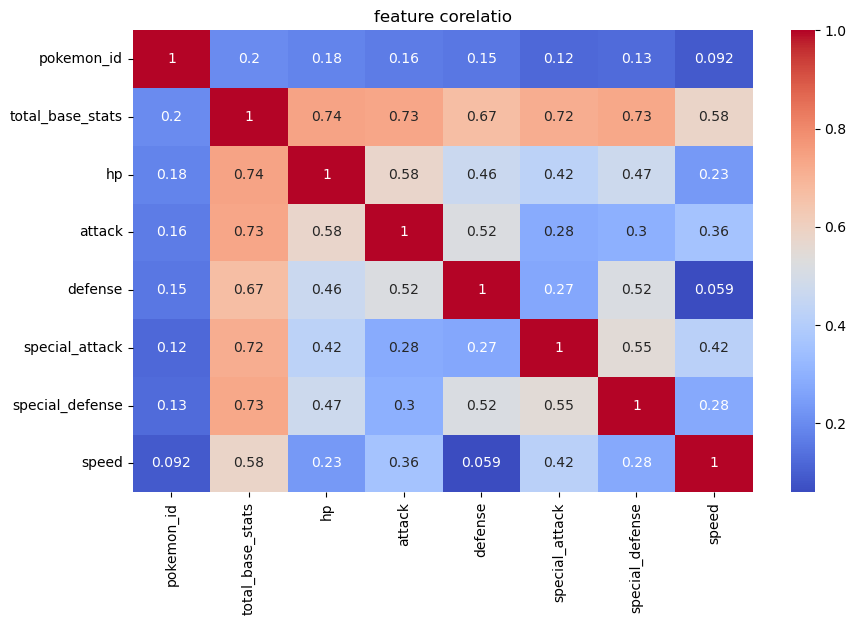

In [97]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_col].corr(),annot=True,cmap='coolwarm')
plt.title('feature corelatio' )
plt.show()

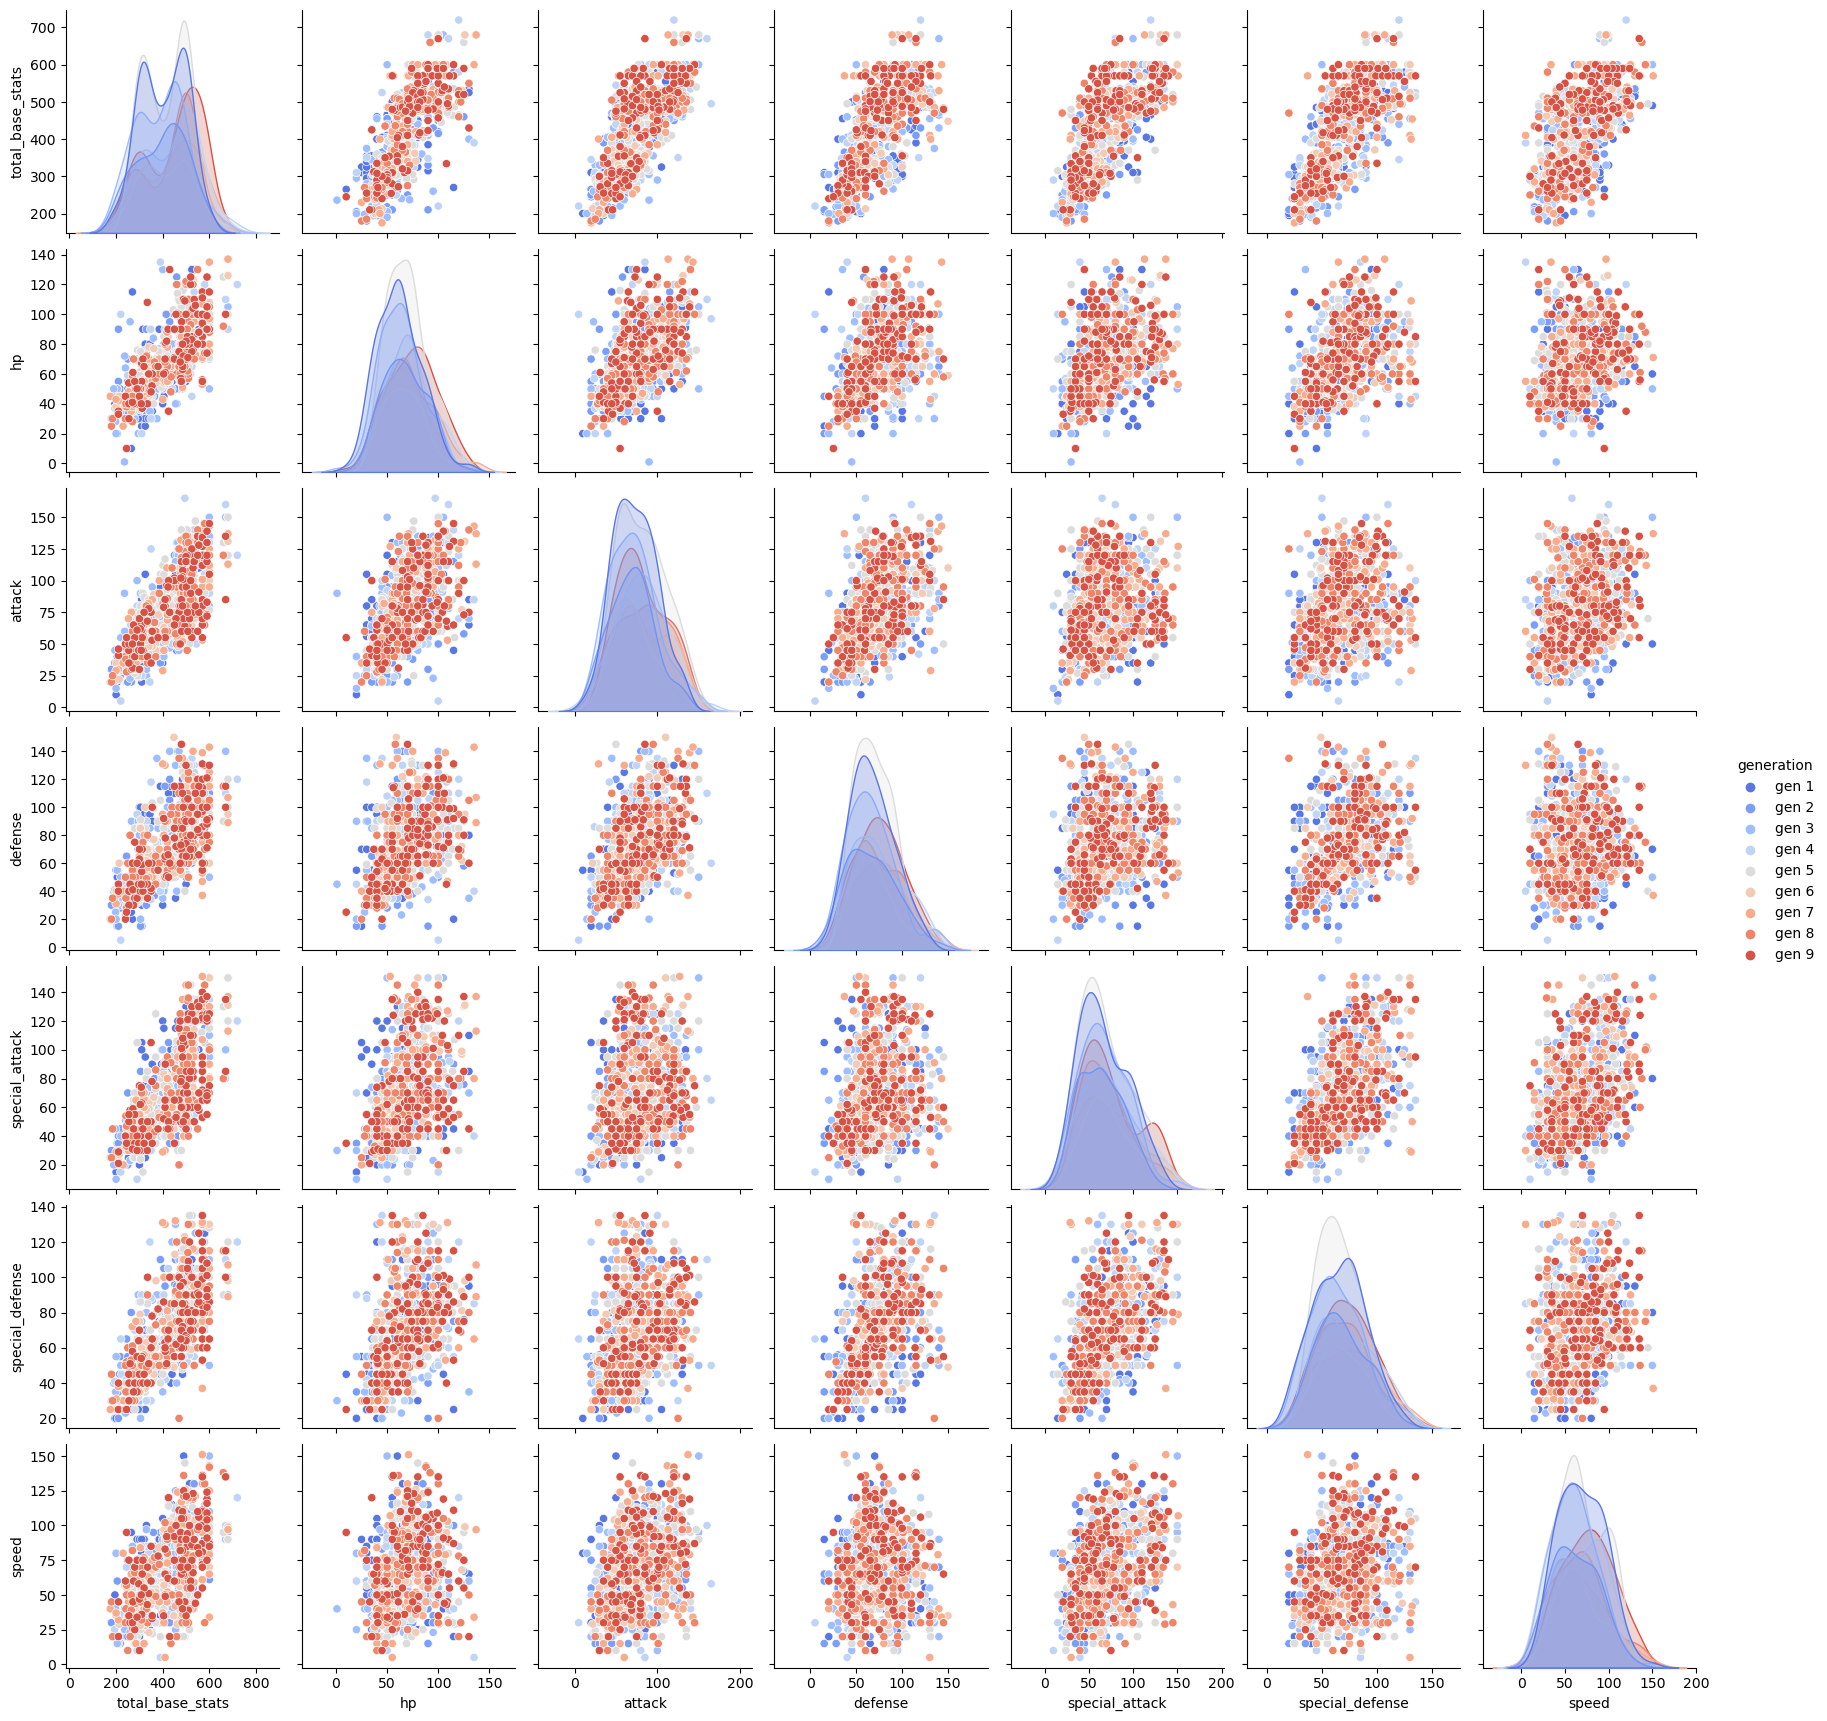

In [105]:
sns.pairplot(df[['total_base_stats', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'generation']],  
hue='generation', palette='coolwarm')  
plt.show()


In [112]:
num_col = df[['total_base_stats', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']]
correlation_matrix = num_col.corr()
correlation_matrix

,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
total_base_stats,1.000000,0.739279,0.734361,0.668051,0.715577,0.731458,0.581484
hp,0.739279,1.000000,0.575054,0.463980,0.423393,0.471487,0.232406
attack,0.734361,0.575054,1.000000,0.519066,0.282546,0.296226,0.357073
defense,0.668051,0.463980,0.519066,1.000000,0.270423,0.517449,0.059474
special_attack,0.715577,0.423393,0.282546,0.270423,1.000000,0.547359,0.417902
special_defense,0.731458,0.471487,0.296226,0.517449,0.547359,1.000000,0.276988
speed,0.581484,0.232406,0.357073,0.059474,0.417902,0.276988,1.000000


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### checking for Multicollinearity 

In [ ]:
num_col=df[[ 'hp', 'attack', 'defense',
       'special_attack', 'special_defense', 'speed']]
vif_data=pd.DataFrame()
vif_data["Feature"] = num_col.columns
vif_data["VIF"] = [variance_inflation_factor(num_col.values, i) for i in range(len(num_col.columns))]
print(vif_data)
 

           Feature        VIF
0               hp  17.444106
1           attack  15.608945
2          defense  14.513058
3   special_attack  11.108803
4  special_defense  16.906542
5            speed   8.432330


In [116]:
df.columns

Index(['pokemon_id', 'name', 'primary_type', 'secondary_type',
       'first_appreance', 'generation', 'category', 'total_base_stats', 'hp',
       'attack', 'defense', 'special_attack', 'special_defense', 'speed'],
      dtype='object')

In [117]:
from sklearn.preprocessing import *

In [119]:
le=LabelEncoder()
df['generation']=le.fit_transform(df['generation'])

In [121]:
df=pd.get_dummies(df,columns=['primary_type', 'secondary_type',
       'first_appreance','category'],drop_first=True)

In [122]:
sc=StandardScaler()

In [133]:
num_cols = ['total_base_stats', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

df[num_cols]=sc.fit_transform(df[num_cols])

In [134]:
num_cols

['total_base_stats',
 'hp',
 'attack',
 'defense',
 'special_attack',
 'special_defense',
 'speed']

In [135]:
df[num_cols].describe()

,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
count,9.790000e+02,9.790000e+02,979.000000,9.790000e+02,9.790000e+02,9.790000e+02,9.790000e+02
mean,7.257842e-18,-2.903137e-17,0.000000,7.257842e-18,-2.177353e-17,2.903137e-17,-3.266029e-17
std,1.000511e+00,1.000511e+00,1.000511,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00
min,-2.224466e+00,-2.985144e+00,-2.456046,-2.508470e+00,-2.036838e+00,-2.000639e+00,-2.200883e+00
25%,-9.187726e-01,-8.097067e-01,-0.752971,-7.929191e-01,-8.272817e-01,-7.735325e-01,-7.854592e-01
50%,1.618009e-01,-9.935970e-02,-0.071741,-6.857532e-02,-1.628774e-01,-1.599792e-01,-7.774712e-02
75%,7.065900e-01,5.665906e-01,0.711673,7.320152e-01,6.889229e-01,6.580917e-01,7.892001e-01
max,2.683139e+00,3.052805e+00,2.993793,3.019417e+00,2.767316e+00,2.703269e+00,2.965415e+00


In [141]:
df.drop(columns=['pokemon_id','name'],inplace=True)

In [142]:
df

,generation,total_base_stats,hp,attack,defense,special_attack,special_defense,speed,primary_type_dark,primary_type_dragon,...,first_appreance_red/blue,first_appreance_ruby/sapphire,first_appreance_scarlet/violet,first_appreance_sun/moon,first_appreance_sword/shield,first_appreance_x/y,category_mythical,category_paradox,category_regular,category_ultra beast
0,0,-0.936782,-1.031690,-0.957340,-0.831042,-0.162877,-0.159979,-0.785459,False,False,...,True,False,False,False,False,False,False,False,True,False
1,0,-0.153366,-0.365740,-0.514541,-0.297315,0.348203,0.453574,-0.254675,False,False,...,True,False,False,False,False,False,False,False,True,False
2,0,0.927207,0.522194,0.166689,0.465152,1.029643,1.271645,0.453037,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0,-1.017825,-1.298070,-0.855156,-1.059783,-0.333237,-0.773532,-0.077747,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0,-0.153366,-0.454533,-0.446418,-0.487932,0.348203,-0.159979,0.453037,False,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,8,1.512518,1.632111,1.290718,1.913839,-0.162877,0.985320,0.842279,False,False,...,False,False,True,False,False,False,False,True,False,False
1020,8,1.512518,2.520045,-0.139864,0.770139,2.290307,0.821706,0.276109,False,False,...,False,False,True,False,False,False,False,True,False,False
1021,8,1.512518,0.966161,1.461026,0.350782,-0.060661,1.598873,2.010003,False,False,...,False,False,True,False,False,False,False,False,True,False
1022,8,1.512518,0.966161,-0.173926,1.113249,1.779227,1.598873,1.089978,False,False,...,False,False,True,False,False,False,False,True,False,False


In [159]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import *

In [155]:
X=df.drop(columns=['total_base_stats'])
Y=df['total_base_stats']

In [158]:
print(X.shape)
print(Y.shape)

(979, 54)
(979,)


(979,)


In [157]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y ,test_size=0.2,random_state=42)

In [162]:
ridge=Ridge()
param_grid={'alpha':[0.01,0.1,1,10,100]}

gridsearch=GridSearchCV(ridge,param_grid,cv=5,scoring='r2')
gridsearch.fit(X_train,Y_train)

print('Best_alpha:',gridsearch.best_params_['alpha'])
print('best_r2:',gridsearch.best_score_)

Best_alpha: 0.01
best_r2: 0.9999999999322828
